In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# Load and inspect Iris data
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


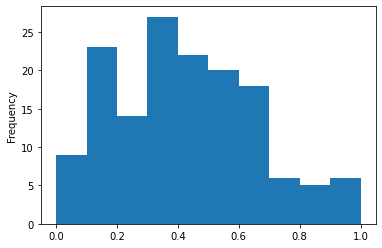

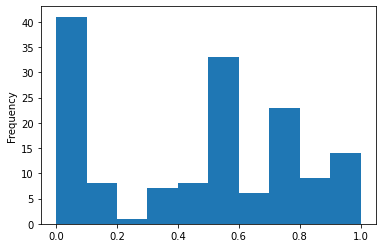

In [7]:
# use MinMaxScaler to scale the columns of interest
min_max_scaler = preprocessing.MinMaxScaler()
df['SepalLengthCm'] = min_max_scaler.fit_transform(df['SepalLengthCm'].values.reshape(-1,1))
df['PetalWidthCm'] = min_max_scaler.fit_transform(df['PetalWidthCm'].values.reshape(-1,1))

# visualise the data
df['SepalLengthCm'].plot.hist()
plt.show()
df['PetalWidthCm'].plot.hist()
plt.show()

In [11]:
# Define the dataframe with two variables of interest for clustering
X = df[['SepalLengthCm', 'PetalWidthCm']]

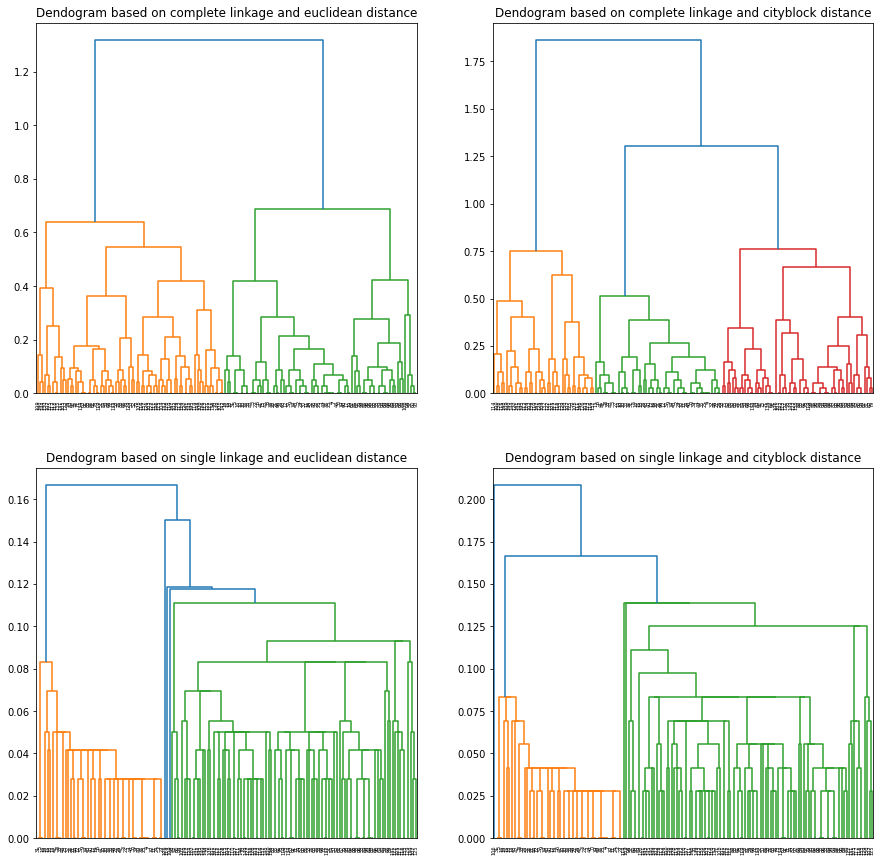

In [33]:
# Create lists of linkage types and distance measurements to check
linkage_types = ['complete', 'single']
distance_measure = ['euclidean', 'cityblock']

# Plot dendograms for all combinations of linkage and distance measurement
plt.figure(figsize=[15,15])
count = 0
for l in linkage_types:
    for m in distance_measure:
        count += 1
        plt.subplot(2, 2, count)
        dend = dendrogram(linkage(X, method=l, metric=m))  
        plt.title('Dendogram based on {} linkage and {} distance'.format(l,m))
plt.show()

I am going to choose the dendogram based on complete linkage and cityblock distance. This dendogram has well defined three clusters that are different from each other. 

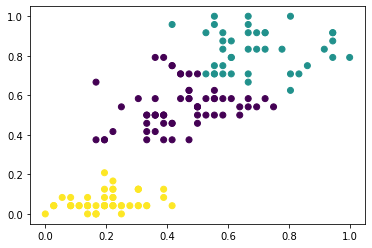

In [28]:
# Create a model based on complete linkage and cityblock distance for three clusters
cluster = AgglomerativeClustering(n_clusters=3, metric='cityblock', linkage='complete')
# Predict the labels
cluster.fit_predict(X)
# Visualise the label prediction 
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=cluster.labels_)

In [32]:
# Check the silhouette score of the model
silhouette_score(X, cluster.fit_predict(X))

0.5306083961038136

The Silhouette Score can fall between -1 and 1. Score of 0.53 is informative but not the most reliable as some entries might be misclassified. 